In [35]:
import numpy as np
from autograd import numpy as anp
import  matplotlib.pyplot as plt
from maxent import MaxEnt

In [36]:
#assume mean=0, var=1
def f_SkewKurt(x):
    return np.array([x,x**2,x**3,x**4])

def nth_moment_lognormal(n,mu,s2):
    if(n==1):
        return 0
    if(n==2):
        return 1
    if(n==3):
        return (np.exp(s2)+2)*np.sqrt(np.exp(s2)-1) # skewness
    if(n==4):
        ex_s = np.exp(s2)
        return ex_s**4 + 2*ex_s**3 + 3*ex_s**2 - 3 # kurtosis


def b_SkewKurt_lognormal(mu, s2):
    return np.array([nth_moment_lognormal(n,mu,s2) for n in range(1,5)])

The algorithm may not be converging. 
Use 'ob._visualize_algorithm()' to inspect.
The resulting parameters:
  Lambda_1 = 156.998
  Lambda_2 = 164.848
  Lambda_3 = -110.819
  Lambda_4 = 12.438


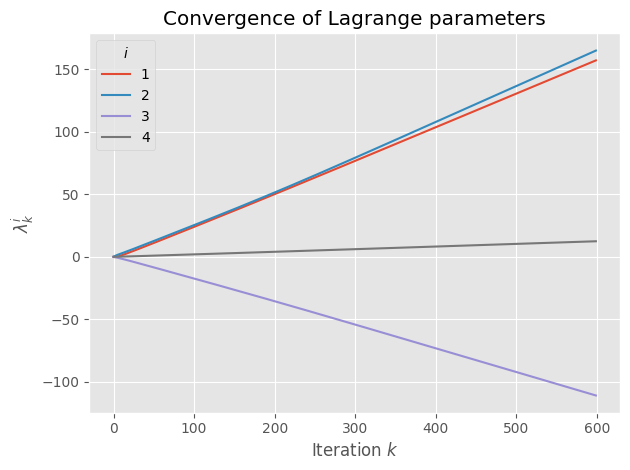

(Estimate of) absolute integration error of norm. const.: 4.471e+121


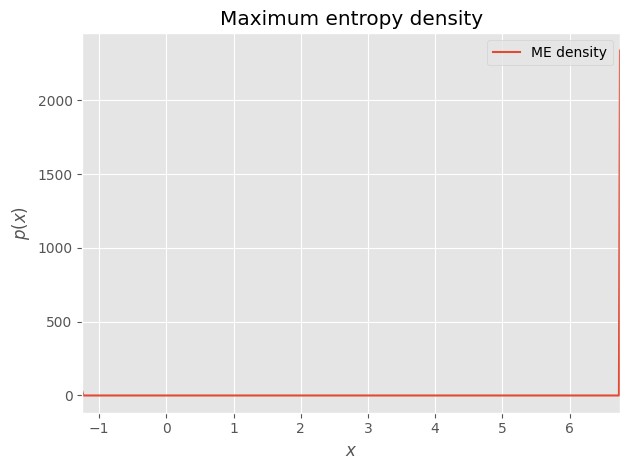

In [87]:
mu = 0
s2 = 1

l = -np.exp(mu+s2/2)+0.4
u = l+8
n = 60
b = b_SkewKurt_lognormal(mu,s2)

ob_skewkurt = MaxEnt(l,u,n,b,f_SkewKurt,message=False)
ob_skewkurt._algorithm(600)
ob_skewkurt._visualize_algorithm()
ob_skewkurt._visualize_solution()